In [1]:
import random
import math
import numpy as np

🧮 Rosenbrock Function (Objective Function)
f(x,y)=(a−x) ^
2
 +b(y−x ^
2
 ) ^
2
 
Typically, a=1, b=100

The global minimum is at (1,1), where f(x,y)=0

In [2]:
# Objective function: Rosenbrock
def rosenbrock(x, y, a = 1, b = 100):
    return (a - x) ** 2 + b * (y - x ** 2) ** 2

In [3]:
rosenbrock(1, 1, a = 1, b = 100)

0

In [4]:
# Generate a neighboring solution by adding small random noise
def get_neighbor(solution, step_size=0.1):
    return [x + random.uniform(-step_size, step_size) for x in solution]

In [5]:
get_neighbor([1,2,3,4], step_size=0.1)

[0.9620748290975396, 1.949645202427611, 3.0299968924696943, 3.918775294777218]

In [6]:
# Bounds to restrict search space (optional)
def clamp(value, min_val, max_val):
    return max(min_val, min(value, max_val))

In [7]:
clamp(4, 0, 10)

4

In [8]:
clamp(4, 7, 10)

7

In [9]:
clamp(4, 0, 3)

3

In [10]:
# Simulated Annealing for function minimization
def simulated_annealing(func, bounds, initial_temp=1000, cooling_rate=0.995, max_iter=1000, step_size=0.1):
    # Start with a random point within bounds
    current_solution = [random.uniform(bounds[i][0], bounds[i][1]) for i in range(len(bounds))]
    current_cost = func(*current_solution)

    best_solution = current_solution[:]
    best_cost = current_cost

    temp = initial_temp

    for iteration in range(max_iter):
        neighbor = get_neighbor(current_solution, step_size)

        # Clamp neighbor coordinates within bounds
        neighbor = [clamp(neighbor[i], bounds[i][0], bounds[i][1]) for i in range(len(neighbor))]

        neighbor_cost = func(*neighbor)
        delta = neighbor_cost - current_cost

        if delta < 0 or random.random() < math.exp(-delta / temp):
            current_solution = neighbor
            current_cost = neighbor_cost

            if current_cost < best_cost:
                best_solution = current_solution[:]
                best_cost = current_cost

        temp *= cooling_rate

    return best_solution, best_cost

In [11]:
# Example usage
# Define bounds for x and y
bounds = [(-5, 5), (-5, 5)]  # x ∈ [-5, 5], y ∈ [-5, 5]

best_params, best_value = simulated_annealing(
    rosenbrock,
    bounds,
    initial_temp = 1000,
    cooling_rate = 0.99,
    max_iter = 5000,
    step_size = 0.05
)

print("Best Solution (x, y):", best_params)
print("Minimum Value of Rosenbrock:", best_value)

Best Solution (x, y): [0.9967564979166103, 0.9931710567835839]
Minimum Value of Rosenbrock: 2.2943065485966486e-05


Best Solution (x, y): [0.8991632792439375, 0.8062319423102705]
Minimum Value of Rosenbrock: 0.010680007475184272


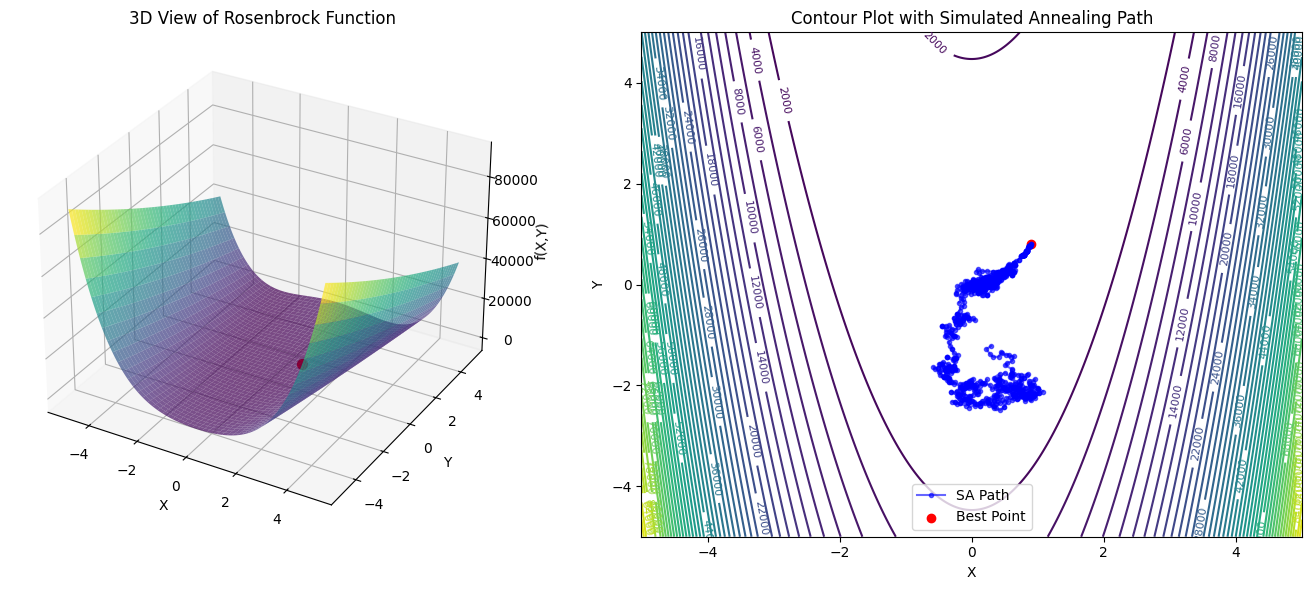

In [15]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Objective function: Rosenbrock
def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

# Generate a neighboring solution by adding small random noise
def get_neighbor(solution, step_size=0.1):
    return [x + random.uniform(-step_size, step_size) for x in solution]

# Bounds to restrict search space
def clamp(value, min_val, max_val):
    return max(min_val, min(value, max_val))

# Simulated Annealing with path recording
def simulated_annealing_with_path(func, bounds, initial_temp=1000, cooling_rate=0.995, max_iter=1000, step_size=0.1):
    current_solution = [random.uniform(bounds[i][0], bounds[i][1]) for i in range(len(bounds))]
    current_cost = func(*current_solution)

    best_solution = current_solution[:]
    best_cost = current_cost

    temp = initial_temp

    path = [current_solution[:]]  # Record path

    for iteration in range(max_iter):
        neighbor = get_neighbor(current_solution, step_size)
        neighbor = [clamp(neighbor[i], bounds[i][0], bounds[i][1]) for i in range(len(neighbor))]
        neighbor_cost = func(*neighbor)
        delta = neighbor_cost - current_cost

        if delta < 0 or random.random() < math.exp(-delta / temp):
            current_solution = neighbor
            current_cost = neighbor_cost

            if current_cost < best_cost:
                best_solution = current_solution[:]
                best_cost = current_cost

        temp *= cooling_rate

        path.append(current_solution[:])

    return best_solution, best_cost, np.array(path)

# Example usage
if __name__ == "__main__":
    # Define bounds for x and y
    bounds = [(-5, 5), (-5, 5)]  # x ∈ [-5, 5], y ∈ [-5, 5]

    best_params, best_value, path = simulated_annealing_with_path(
        rosenbrock,
        bounds,
        initial_temp=1000,
        cooling_rate=0.99,
        max_iter=1000,
        step_size=0.1
    )

    print("Best Solution (x, y):", best_params)
    print("Minimum Value of Rosenbrock:", best_value)

    # Create meshgrid for visualization
    x = np.linspace(-5, 5, 400)
    y = np.linspace(-5, 5, 400)
    X, Y = np.meshgrid(x, y)
    Z = rosenbrock(X, Y)

    # Plot 3D Surface
    fig = plt.figure(figsize=(14, 6))
    
    # 3D Surface Plot
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')
    ax1.scatter(best_params[0], best_params[1], best_value, color='red', s=50, label='Best Point')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('f(X,Y)')
    ax1.set_title('3D View of Rosenbrock Function')

    # Contour Plot with Path
    ax2 = fig.add_subplot(122)
    contour = ax2.contour(X, Y, Z, levels=50, cmap='viridis')
    ax2.clabel(contour, inline=True, fontsize=8)
    ax2.plot(path[:, 0], path[:, 1], 'b.-', alpha=0.6, label='SA Path')
    ax2.scatter(best_params[0], best_params[1], color='red', label='Best Point')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title('Contour Plot with Simulated Annealing Path')
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [1]:
#pip install numpy matplotlib scikit-opt

https://scikit-optimize.github.io/stable/

In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from sko.PSO import PSO
from sko.GA import GA

# Rosenbrock function
def rosenbrock(x, y):
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

# Bounds
bounds = [(-5, 5), (-5, 5)]

# Simulated Annealing
def simulated_annealing(func, bounds, temp=1000, cooling_rate=0.99, max_iter=1000, step_size=0.1):
    current = [random.uniform(b[0], b[1]) for b in bounds]
    cost = func(*current)
    best = current[:]
    best_cost = cost

    for _ in range(max_iter):
        neighbor = [x + random.uniform(-step_size, step_size) for x in current]
        neighbor = [np.clip(neighbor[i], bounds[i][0], bounds[i][1]) for i in range(len(neighbor))]
        neighbor_cost = func(*neighbor)

        if neighbor_cost < cost or random.random() < math.exp(-(neighbor_cost - cost) / temp):
            current = neighbor
            cost = neighbor_cost

        if cost < best_cost:
            best = current[:]
            best_cost = cost

        temp *= cooling_rate

    return best, best_cost


# Hill Climbing
def hill_climbing(func, bounds, max_iter=1000, step_size=0.1):
    current = [random.uniform(b[0], b[1]) for b in bounds]
    cost = func(*current)
    best = current[:]
    best_cost = cost

    for _ in range(max_iter):
        neighbor = [x + random.uniform(-step_size, step_size) for x in current]
        neighbor = [np.clip(neighbor[i], bounds[i][0], bounds[i][1]) for i in range(len(neighbor))]
        neighbor_cost = func(*neighbor)

        if neighbor_cost < cost:
            current = neighbor
            cost = neighbor_cost

        if cost < best_cost:
            best = current[:]
            best_cost = cost

    return best, best_cost


# Genetic Algorithm using scikit-opt
def ga_optimizer():
    def obj_func(p):
        return rosenbrock(p[0], p[1])

    ga = GA(func=obj_func, n_dim=2, size_pop=50, max_iter=100,
            lb=[-5, -5], ub=[5, 5], precision=1e-7)
    best_x, best_y = ga.run()
    return best_x, best_y


# Particle Swarm Optimization using scikit-opt
def pso_optimizer():
    def obj_func(p):
        return rosenbrock(p[0], p[1])

    pso = PSO(func=obj_func, dim=2, pop=40, max_iter=100,
              lb=[-5, -5], ub=[5, 5], c1=1.5, c2=1.5, w=0.8)
    pso.run()
    best_x = pso.gbest_x
    best_y = pso.gbest_y
    return best_x, best_y


# Run all optimizers
sa_result = simulated_annealing(rosenbrock, bounds)
hc_result = hill_climbing(rosenbrock, bounds)
ga_result = ga_optimizer()
pso_result = pso_optimizer()

print("Simulated Annealing:", sa_result)
print("Hill Climbing:", hc_result)
print("Genetic Algorithm:", ga_result)
print("Particle Swarm Optimization:", pso_result)

Simulated Annealing: ([np.float64(0.9895153541995043), np.float64(0.9810821005009924)], np.float64(0.0004868561620963285))
Hill Climbing: ([np.float64(1.0301578765663344), np.float64(1.0577067199721875)], np.float64(0.002147503333228556))
Genetic Algorithm: (array([0.43945242, 0.19311536]), array([0.31421359]))
Particle Swarm Optimization: (array([0.98542815, 0.97385439]), array([0.00098838]))


https://blog.programstore.ir/%d8%aa%d9%88%d8%a7%d8%a8%d8%b9-%d8%aa%d8%b3%d8%aa-%d8%a7%d9%84%da%af%d9%88%d8%b1%db%8c%d8%aa%d9%85%d9%87%d8%a7%db%8c-%d8%a8%d9%87%db%8c%d9%86%d9%87%d8%b3%d8%a7%d8%b2%db%8c/

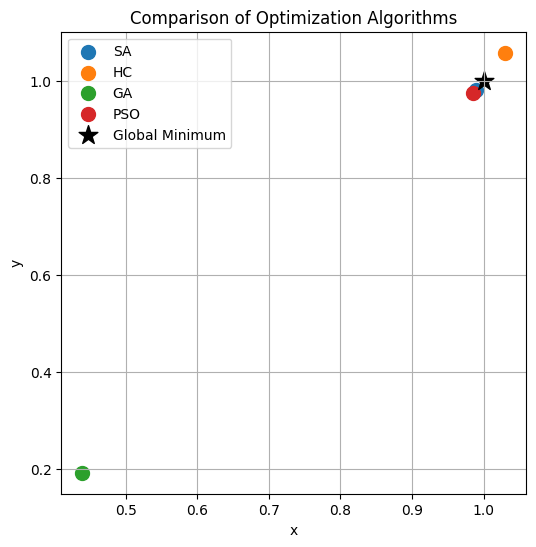

In [8]:
methods = ['SA', 'HC', 'GA', 'PSO']
results = [sa_result[0], hc_result[0], ga_result[0], pso_result[0]]

plt.figure(figsize=(6, 6))
for i, (name, (x, y)) in enumerate(zip(methods, results)):
    plt.scatter(x, y, label=name, s=100)

plt.scatter(1, 1, color='black', marker='*', s=200, label='Global Minimum')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Optimization Algorithms')
plt.legend()
plt.grid(True)
plt.show()

## 🧠 Summary Table

| Method                | Accuracy | Escapes Local Optima? | Speed | Best Use Case                   |
|-----------------------|----------|------------------------|-------|----------------------------------|
| **Simulated Annealing** | High     | ✅ Yes                  | Medium| Complex landscapes               |
| **Hill Climbing**        | Low      | ❌ No                   | Fast  | Simple functions, small spaces   |
| **Genetic Algorithm**    | High     | ✅ Yes                  | Slow  | Large search space               |
| **PSO**                 | Very High| ✅ Yes                  | Fast  | Continuous, multi-dimensional    |

---

## 🔁 Overview of Each Algorithm

| Algorithm             | Type        | Strengths                          | Weaknesses                         |
|----------------------|-------------|------------------------------------|------------------------------------|
| **Simulated Annealing (SA)** | Probabilistic | Good at escaping local minima      | Slower convergence                 |
| **Hill Climbing**         | Deterministic | Simple and fast                    | Easily stuck in local minima       |
| **Genetic Algorithm (GA)**| Population-based | Global search, good for complex landscapes | Needs large population & tuning |
| **PSO**                  | Population-based | Fast convergence, simple to tune  | May prematurely converge          |

---

Best solution found: [1.00043015 1.00086009]
Minimum function value: 1.8504392449281622e-07


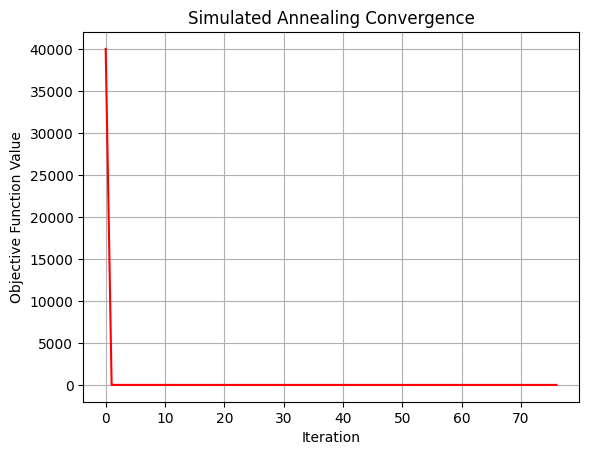

In [21]:
from sko.SA import SA
import numpy as np
import matplotlib.pyplot as plt

# Define the Rosenbrock function (objective function)
def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

# Bounds for each variable
lb = [-5, -5]
ub = [5, 5]

# Initialize Simulated Annealing
sa = SA(
    func=rosenbrock,        # Objective function
    x0=[-4, -4],            # Initial guess
    T_max=1000,             # Start temperature
    T_min=1e-9,             # Final temperature
    L=300,                  # Number of iterations at each temperature
    lb=lb,                  # Lower bounds
    ub=ub,                  # Upper bounds
    max_stay_counter=150    # Stop if no improvement for this many steps
)

# Run the algorithm
best_x, best_y = sa.run()

# Print results
print("Best solution found:", best_x)
print("Minimum function value:", best_y)

# Optional: Plot convergence curve
plt.plot(sa.best_y_history, 'r')
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Simulated Annealing Convergence")
plt.grid(True)
plt.show()

In [25]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Objective Function: Rosenbrock
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Bounds
bounds = [(-5, 5), (-5, 5)]

# Simulated Annealing Class
class SimulatedAnnealing:
    def __init__(self, func, bounds, 
                 temp=1000, cooling_rate=0.99, 
                 step_size=0.1, max_iter=1000):
        self.func = func
        self.bounds = bounds
        self.temp = temp
        self.cooling_rate = cooling_rate
        self.step_size = step_size
        self.max_iter = max_iter

        # History tracking
        self.path = []
        self.costs = []

    def _random_solution(self):
        return [random.uniform(low, high) for low, high in self.bounds]

    def _get_neighbor(self, solution):
        return [
            np.clip(x + random.uniform(-self.step_size, self.step_size), low, high)
            for x, (low, high) in zip(solution, self.bounds)
        ]

    def _acceptance_probability(self, old_cost, new_cost, temp):
        if new_cost < old_cost:
            return 1.0
        return math.exp((old_cost - new_cost) / temp)

    def run(self):
        current = self._random_solution()
        current_cost = self.func(*current)

        best = current[:]
        best_cost = current_cost

        self.path.append(current[:])
        self.costs.append(current_cost)

        temp = self.temp

        for iteration in range(self.max_iter):
            neighbor = self._get_neighbor(current)
            neighbor_cost = self.func(*neighbor)

            if self._acceptance_probability(current_cost, neighbor_cost, temp) > random.random():
                current = neighbor
                current_cost = neighbor_cost

            if current_cost < best_cost:
                best = current[:]
                best_cost = current_cost

            self.path.append(current[:])
            self.costs.append(current_cost)

            temp *= self.cooling_rate

        self.best_solution = best
        self.best_cost = best_cost
        self.final_temp = temp

        return best, best_cost

    def get_path(self):
        return np.array(self.path)

    def get_costs(self):
        return np.array(self.costs)

# Run SA
sa = SimulatedAnnealing(
    func=rosenbrock,
    bounds=bounds,
    temp=1000,
    cooling_rate=0.99,
    step_size=0.1,
    max_iter=500
)

best, cost = sa.run()
print("Best Solution:", best)
print("Minimum Value:", cost)

Best Solution: [np.float64(2.032977906438702), np.float64(4.143533811440708)]
Minimum Value: 1.0781412262897336


In [26]:
def multi_obj_func(x):
    f1 = x**2           # Minimize x^2
    f2 = (x - 2)**2     # Minimize (x - 2)^2
    return [f1, f2]

In [27]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Multi-objective Rosenbrock-like function
def multi_obj_rosenbrock(x):
    f1 = (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
    f2 = (x[0] + x[1])**2
    return [f1, f2]

# Bounds
bounds = [(-5, 5), (-5, 5)]

class MultiObjectiveSA:
    def __init__(self, func, bounds,
                 temp=1000, cooling_rate=0.99,
                 step_size=0.1, max_iter=500):
        self.func = func
        self.bounds = bounds
        self.temp = temp
        self.cooling_rate = cooling_rate
        self.step_size = step_size
        self.max_iter = max_iter

        # History tracking
        self.archive = []  # Stores non-dominated solutions
        self.path = []     # All visited points
        self.costs = []    # Objective values

    def _random_solution(self):
        return [random.uniform(low, high) for low, high in self.bounds]

    def _get_neighbor(self, solution):
        return [
            np.clip(x + random.uniform(-self.step_size, self.step_size), low, high)
            for x, (low, high) in zip(solution, self.bounds)
        ]

    def _is_dominated(self, a, b):
        """Check if solution a is dominated by solution b"""
        dominates = False
        for ai, bi in zip(a, b):
            if ai > bi:
                return False  # a is worse than b in this objective
            elif ai < bi:
                dominates = True  # a is better in at least one
        return dominates

    def _update_archive(self, candidate):
        """Add to archive only if non-dominated"""
        to_keep = []
        f_candidate = self.func(candidate)

        dominated = False
        for sol in self.archive:
            f_sol = sol['cost']
            if self._is_dominated(f_sol, f_candidate):
                # Existing solution dominates new candidate
                return
            if self._is_dominated(f_candidate, f_sol):
                # Candidate dominates existing → remove old
                continue
            to_keep.append(sol)
        to_keep.append({'solution': candidate[:], 'cost': f_candidate[:]})
        self.archive = to_keep

    def run(self):
        current = self._random_solution()
        current_cost = self.func(current)

        self.path.append(current)
        self.costs.append(current_cost)
        self._update_archive(current)

        temp = self.temp

        for iteration in range(self.max_iter):
            neighbor = self._get_neighbor(current)
            neighbor_cost = self.func(neighbor)

            # Acceptance based on any objective improvement
            if self._is_dominated(neighbor_cost, current_cost):
                current = neighbor
                current_cost = neighbor_cost

            else:
                # Probabilistic acceptance
                delta = sum(nc - cc for nc, cc in zip(neighbor_cost, current_cost))
                if random.random() < math.exp(-delta / temp):
                    current = neighbor
                    current_cost = neighbor_cost

            self.path.append(current[:])
            self.costs.append(current_cost[:])
            self._update_archive(current)

            temp *= self.cooling_rate

        self.final_temp = temp
        return self.archive

    def get_path(self):
        return np.array(self.path)

    def get_costs(self):
        return np.array(self.costs)

    def get_archive(self):
        return np.array([sol['solution'] for sol in self.archive]), \
               np.array([sol['cost'] for sol in self.archive])

In [29]:
# Run SA
mo_sa = MultiObjectiveSA(
    func=multi_obj_rosenbrock,
    bounds=bounds,
    temp=1000,
    cooling_rate=0.99,
    step_size=0.1,
    max_iter=300
)

archive = mo_sa.run()

print("Non-dominated solutions (Pareto Front):")
for sol in archive:
    print(f"Solution: {sol['solution']}, Cost: {sol['cost']}")

Non-dominated solutions (Pareto Front):
Solution: [-3.601834025474523, 3.8982704110112714], Cost: [8256.626730722553, 0.08787453067009163]
Solution: [-3.601834025474523, 3.8982704110112714], Cost: [8256.626730722553, 0.08787453067009163]
Solution: [-3.601834025474523, 3.8982704110112714], Cost: [8256.626730722553, 0.08787453067009163]
Solution: [np.float64(-3.439943722902008), np.float64(3.885132138851855)], Cost: [np.float64(6336.91174647318), np.float64(0.19819272569593394)]
Solution: [np.float64(-3.4862110885175635), np.float64(3.862165884346215)], Cost: [np.float64(6895.026414885137), np.float64(0.14134200850656306)]
Solution: [np.float64(-3.409498147188605), np.float64(3.937287064456331)], Cost: [np.float64(5929.041022618245), np.float64(0.27856114119063846)]
Solution: [np.float64(-3.253043952207501), np.float64(3.786100843147825)], Cost: [np.float64(4636.913823448397), np.float64(0.2841496489789644)]
Solution: [np.float64(-3.18964513899165), np.float64(3.78569348153252)], Cost: [